In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Second combination/preprocessed1.csv')


In [3]:
df

,id,carat,depth,table,x,price,cut_encoded,color_encoded,clarity_encoded
0,0,0.30,62.4,58.0,4.31,6.353,1,5,0
1,1,1.01,62.7,56.0,6.42,9.183,4,6,5
2,2,0.72,61.8,59.0,5.71,7.983,4,4,3
3,3,1.08,63.2,57.0,6.54,8.371,3,3,0
4,4,0.36,62.3,59.0,4.50,6.588,1,3,4
...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,62.1,59.0,4.78,6.551,1,5,0
40451,40451,0.53,62.0,58.0,5.21,7.382,1,3,3
40452,40452,0.80,62.8,58.0,5.86,7.768,2,3,0
40453,40453,1.01,61.5,57.0,6.40,8.726,3,4,3


## Model adjustment 1

In [4]:
X = df.drop('price', axis =1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)


### Decision tree

In [5]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 14.1 µs


In [9]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [10]:
# max depth

print(regressor.tree_.max_depth)

35


In [11]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [15]:
y_pred_test_dt

array([8.698, 6.792, 6.561, ..., 7.256, 6.978, 7.959])

In [16]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [17]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.005973e-01,1.950410e-02,1.396571e-01,0.980902,test,Decission Tree I
1,8.864220e-18,1.469791e-32,1.212349e-16,1.000000,train,Decission Tree I


In [18]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [19]:
%time
gs.fit(X_train, y_train)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 29.1 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.178, test=-0.179) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.072, test=-0.073) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.729, test=-0.735) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.910, test=-0.935) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.201, test=-0.199) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.113, test=-0.112) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.204, test=-0.208) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.099, test=-0.106) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.057, test=-0.058) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.074, test=-0.073) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.064, test=-0.066) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.057, test=-0.055) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.208, test=-0.201) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.148, test=-0.148) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.100, test=-0.099) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, 

[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.052, test=-0.053) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.065, test=-0.069) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.053, test=-0.054) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.072, test=-0.068) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.060) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.054, test=-0.054) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.053, test=-0.052) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6,

[CV 9/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.104, test=-0.102) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.062, test=-0.065) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.368, test=-0.361) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.144, test=-0.144) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.391, test=-0.389) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.063, test=-0.062) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.681, test=-0.696) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2

[CV 8/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.046) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.051, test=-0.049) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.047, test=-0.049) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.041, test=-0.041) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.041, test=-0.042) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.043, test=-0.044) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.068, test=-0.069) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.053, test=-0.055) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, m

[CV 7/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.365, test=-0.374) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.897, test=-0.907) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.303, test=-0.296) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.447, test=-0.461) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.121, test=-0.123) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.692, test=-0.699) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.313, test=-0.305) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.301, test=-0.320) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_

[CV 1/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.037, test=-0.038) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.043, test=-0.047) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.042, test=-0.044) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.046, test=-0.044) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.041, test=-0.043) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.050, test=-0.052) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.052, test=-0.055) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.040, test=-0.041) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=

[CV 5/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.030, test=-0.031) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.032, test=-0.033) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.031, test=-0.034) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.031, test=-0.030) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.030, test=-0.032) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.032, test=-0.033) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.031, test=-0.034) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6, min_

[CV 5/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.054, test=-0.062) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.127, test=-0.133) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.056, test=-0.063) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.042, test=-0.040) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.044, test=-0.049) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.046, test=-0.047) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.075, test=-0.081) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, mi

[CV 10/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.030, test=-0.034) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.025, test=-0.025) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.025, test=-0.026) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.025, test=-0.027) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.027) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.030) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=5, min

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [20]:
best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=100)

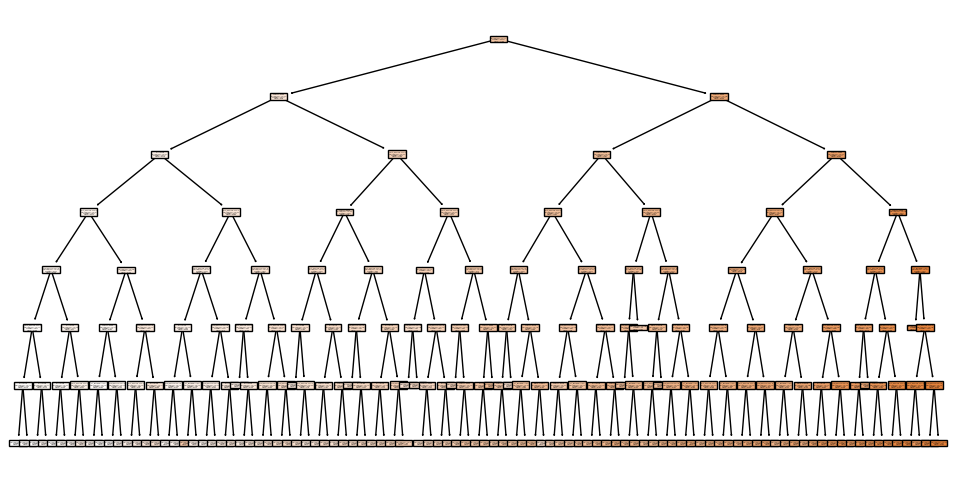

In [21]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


## Prediction

In [22]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [23]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [24]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.122864,0.025116,0.158481,0.975406,test,Decision tree II
1,0.120222,0.023913,0.154640,0.976941,train,Decision tree II


## Test

In [32]:
df1 = pd.read_csv("/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Second combination/reality1.csv", index_col = 0)


In [33]:
df1

,id,carat,depth,table,x,cut_encoded,color_encoded,clarity_encoded
0,0,0.32,60.5,58.0,4.43,4,1,2
1,1,1.24,62.9,60.0,6.80,1,1,2
2,2,1.66,62.0,59.0,7.55,1,5,2
3,3,0.75,60.6,56.0,5.94,1,5,0
4,4,1.50,64.8,55.0,7.26,0,6,0
...,...,...,...,...,...,...,...,...
13480,13480,1.10,59.6,60.0,6.74,1,3,2
13481,13481,0.90,62.1,60.0,6.14,3,5,2
13482,13482,0.30,62.1,53.3,4.30,4,4,3
13483,13483,1.25,59.6,59.0,7.01,4,1,2


In [34]:
X_reality_submision = best_tree.predict(df1)
X_reality_submision

array([6.28871709, 8.62931818, 9.35694051, ..., 6.63721462, 8.62931818,
       7.82413551])

In [35]:
submision1 = pd.DataFrame(X_reality_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.288717
1,1,8.629318
2,2,9.356941
3,3,7.821466
4,4,8.998465
...,...,...
13480,13480,8.463797
13481,13481,8.375063
13482,13482,6.637215
13483,13483,8.629318


In [36]:
submision1.to_csv("submission1_david1.csv", index=False)